In [1]:
#Assignment: To analyse the Saccade data
# 1. Load the data
# 2. Cut the data between 21 and 32 seconds.
# 3. Filter the data with different filters and compare the results
# 4. Do a 2D plot of the data
# 5. Do a plot that represents the duration of each saccade as a function of their amplitude (within 37 and 48 seconds).
#		This means that you will have to detect the saccades! Manual or using a script
# This code is also avalable in my Github: https://github.com/SnehaRayPanda/Saccade_EyeTracking_Signal_analysis 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pck
import pandas as pd
import mpld3
mpld3.enable_notebook()

In [2]:
# provide the data folder path
fl = "C:\\Users\\bkbme\\Desktop\\Sneha_program\\CompNeuro\\data_exam.pck"

# load the data in a variable called 'A' using 'pck.load'
with open(fl, 'rb') as f:
    A = pck.load(f) 

In [3]:
# View A to know what are the data...
A

{'trial0': {'time': array([[-6.139000e-02, -6.039000e-02, -5.939000e-02, ...,  8.442053e+01,
           8.442153e+01,  8.442253e+01]]),
  'signals': array([[511.8999939 , 511.8999939 , 511.8999939 , ..., 543.79998779,
          543.79998779, 544.        ],
         [892.20001221, 892.20001221, 892.40002441, ..., 914.5       ,
          914.40002441, 914.29998779],
         [458.29998779, 458.29998779, 458.        , ..., 486.29998779,
          486.29998779, 486.29998779],
         ...,
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan]]),
  'signalsName': ['0:time',
   '0:0:filt:none:l_x',
   '1:0:filt:none:l_y',
   '2:0:filt:none:r_x',
   '3:0:filt:none:r_y',
   '4:0:filt:none:px',
   '5:0:filt:none:py',
   '6:0

In [4]:
# load the Saccade data signals and other information (i.e., time and target) in different variables from A
time = A['trial0'] ['time']
signals = A['trial0'] ['signals'] 
target = A['trial0'] ['tar'] [0] [1] 

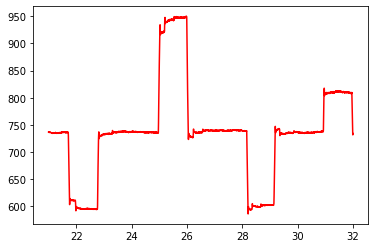

In [8]:
%matplotlib inline
# To plot 21 to 32 sec data, 1st from the time variable, look what is the index for 21sec and 32 sec
# From time, 21sec (19470 time point) to 32sec (30012) signal is 12 sec data, which contain 10542 data points for 12 sec (i.e., 32-21) 
# from 'signalName', l_x and l_y signal contain in '['trial0']['signals'][0]' and ['trial0']['signals'][1]
# plot the signal from 21 to 32 sec l_x
plt.plot(time[0,19470:30012], A['trial0']['signals'][0,19470:30012],'r')

In [ ]:
plt.plot(time[0,19470:30012],A['trial0']['signals'][0,19470:30012])

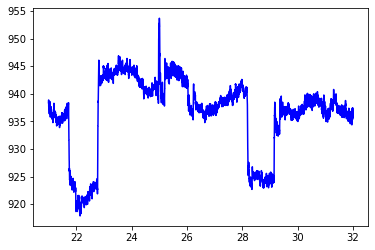

In [9]:
# plot the signal from 21 to 32 sec l_y
plt.plot(time[0,19470:30012], A['trial0']['signals'][1,19470:30012],'b')

In [43]:
from scipy.signal import firwin, lfilter
# desin a FIR filter using the window method.It's a finite impulse response filter, which have linear phase
# Low pass filter designing
ntaps = 11 
cutoff = 0.01 #0.05 
#cutoff_hp = 20 #0.05 
flt_mdl = firwin(ntaps, cutoff)

In [41]:
# to use filter, 1st store the cut sinal in a variable
l_x_signal = signals[0,19470:30012]
l_y_signal = signals[1,19470:30012]

In [42]:
#plot l_x_signal
plt.plot(time[0,19470:30012], l_x_signal,'r')

In [27]:
#plot l_y_signal
plt.plot(time[0,19470:30012], l_y_signal, 'b')

In [44]:
# use the firwin filter in the org signal (i.e.l_x_signal) and plot the filtered signal
l_x_filtered = lfilter(flt_mdl, 1.0, l_x_signal)
plt.plot(time[0,19470:30012],l_x_filtered, 'y')

In [45]:
# use the firwin filter in the org signal (i.e.l_x_signal) and plot both original and filtered signal
l_x_filtered= lfilter(flt_mdl, 1.0,l_x_signal) 
# use 'matplotlib qt' to open the plot in an intractive mode for comparisions
%matplotlib qt

plt.plot(time[0,19470:30012], l_x_signal, 'r')

plt.plot(time[0,19470:30012], l_x_filtered, 'y')
# The results plot will pop-up in a intractive mode. Please zoom the signal to visualize both original and filtered signals

In [59]:
# use the firwin filter in the l_y_signal and plot both original and filtered signal
l_y_filtered= lfilter(flt_mdl, 1.0,l_y_signal) 

plt.plot(time[0,19470:30012], l_y_signal, 'b')

plt.plot(time[0,19470:30012], l_y_filtered, 'g')
# The results plot will pop-up in a intractive mode. Please zoom the signal to visualize both original and filtered signals

In [46]:
# use another filter (i.e., medfilt) to compare firwin filter
from scipy.signal import medfilt

In [50]:
# use medfilt in the org signal (i.e.l_x_signal) and plot both original and filtered signal
l_x_filtered_med = medfilt(l_x_signal, 33)

plt.plot(time[0,19470:30012],l_x_signal, 'r')

plt.plot(time[0,19470:30012],l_x_filtered_med, 'g')

In [51]:
# use medfilt in l_y_signal and plot both original and filtered signal
l_y_filtered_med = medfilt(l_y_signal, 101)
plt.plot(time[0,19470:30012],l_y_signal, 'b')
plt.plot(time[0,19470:30012],l_y_filtered_med, 'm')

In [52]:
# use another filter (i.e., savgol_filter) to compare firwin and medfilt filter
from scipy.signal import savgol_filter

In [53]:
# use savgol_filter in the org signal (i.e.l_x_signal) and plot both original and filtered signal
l_x_filtered_savgol = savgol_filter(l_x_signal, 55, 6,)

plt.plot(time[0,19470:30012],l_x_signal, 'r')

plt.plot(time[0,19470:30012],l_x_filtered_savgol, 'c')

In [57]:
# use vert_signal in l_y_signal and plot both original and filtered signal
l_y_filtered_savgol = savgol_filter(l_y_signal, 55, 6,)
plt.plot(time[0,19470:30012],l_y_signal, 'b')
plt.plot(time[0,19470:30012],l_y_filtered_savgol, 'c')

In [55]:
# Plot original (l_x_signal) with all the filtered signal that used in three way to compare firwin, medfilt and savgol filters
plt.plot(time[0,19470:30012], l_x_signal, 'r')
plt.plot(time[0,19470:30012], l_x_filtered, 'g')
plt.plot(time[0,19470:30012], l_x_filtered_med, 'k')
plt.plot(time[0,19470:30012], l_x_filtered_savgol, 'y')

In [60]:
# Plot original (l_y_signal) with all the filtered signal that used in three way to compare firwin, medfilt and savgol filters
plt.axis([21,32,910,960])
plt.plot(time[0,19470:30012],l_y_signal, 'b')
plt.plot(time[0,19470:30012],l_y_filtered, 'r')
plt.plot(time[0,19470:30012],l_y_filtered_med, 'k')
plt.plot(time[0,19470:30012],l_y_filtered_savgol, 'c')

In [23]:
err_base= l_x_signal
err_fir= l_x_signal - l_x_filtered
err_med= l_x_signal - l_x_filtered_med
err_savgol= l_x_signal - l_x_filtered_savgol

In [24]:
errBins = np.linspace(-0.9,0.9,51) 


_=plt.hist(err_med, errBins, color='r')
_=plt.hist(err_savgol, errBins, color='g')
_=plt.hist(err_fir, errBins, color='c')

In [25]:
print(np.mean(err_fir)) 
print(np.mean(err_med)) 
print(np.mean(err_savgol)) 

0.34765582482607366
0.03154108361939476
-0.00011762158697150399


In [26]:
print(np.std(err_fir))
print(np.std(err_med)) 
print(np.std(err_savgol))

14.383679930196598
0.9617783155510331
0.44322606221110694


In [39]:
# Plot both the best filtered signals in 2D plot separetly 
plt.plot(time[0,19470:30012],l_x_filtered_med, 'r')
plt.plot(time[0,19470:30012],l_y_filtered_med, 'c')
plt.show()

In [71]:
# Plot both the best filtered signals in one figure
%matplotlib qt
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)', size=14)
ax1.set_ylabel('Amplitude of left eye horizontal movement', color=color, size=10)
ax1.plot(time[0,19470:30012], l_x_filtered_med, color=color, label='horizontal movement')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Amplitude of left eye vertical movement', color=color, size=10)  # we already handled the x-label with ax1
ax2.plot(time[0,19470:30012],l_y_filtered_med, color=color, label='vertical movement')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Saccade eye movement (left eye)', size=16)
plt.show()

In [73]:
# Plot eye movement in 2D plot using x and y direction eve movements
plt.plot(l_x_filtered_med, l_y_filtered_med, 'r')
plt.ylabel('horizontal eye movement')
plt.xlabel('vertical eye movement')
plt.title('Eye movement')
plt.show()

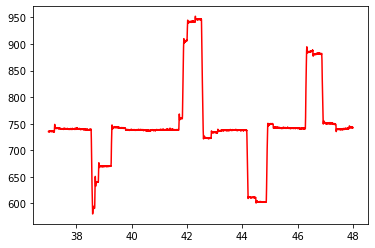

In [78]:
#%% To plot the duration of each saccade as a function of their amplitude from 37 and 48 seconds left horizontal (l_x) eye movement.
# first cut the data for 37 and 48 seconds (which is 34758 to 45244 time point) and you could use a filter (optional)
from scipy.signal import medfilt
data=A['trial0']['signals'][0,34758:45244]
data_med_flt= medfilt(data, 33)
#plt.plot(time[0,34758:45244], data_med_flt,'r')
plt.plot(time[0,34758:45244], data,'r')

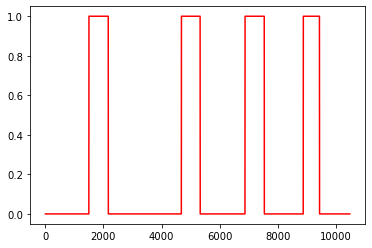

In [79]:
# compute the time points when it goes doun or up from a threshold (i.e, for down=700, for up=800 )
# store the indicess for doun or up sacaddes
# make a binary array (1= when up and down, otherwise zero) for saccade
%matplotlib inline
up = np.where(data>=800);
down = np.where(data<=700);
data1 = np.zeros(data.shape,dtype=float, order='C');
data1[up] = 1
data1[down] = 1
plt.plot(data1,'r')

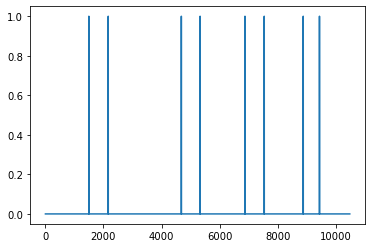

In [81]:
#%% do the differenciation(squred) to get pic for up/down saccards
sacard_sift = np.diff(data1);
sacard_sift=sacard_sift*sacard_sift
plt.plot(sacard_sift)

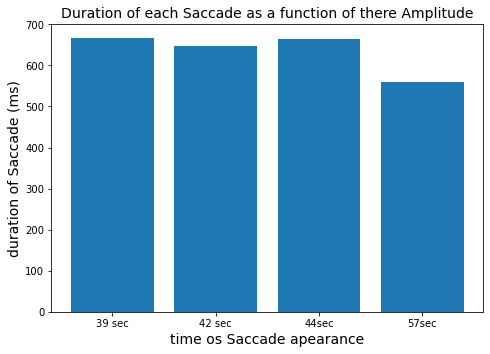

In [92]:
#%% compute the sacard duration from eac congugate pics and excluding 1 interval
shift_index = np.where(sacard_sift==1);
g = np.diff(shift_index,1)
sacard_duration=[g[0][0], g[0][2], g[0][4], g[0][6]]
#%% Plot each sacard duration using bar plot as 'duration of each saccade as a function of their amplitude'
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['39 sec', '42 sec', '44sec', '57sec']
ax.bar(langs,sacard_duration)
ax.set_ylabel('duration of Saccade (ms)', size=14)
ax.set_xlabel('time os Saccade apearance', size=14)
plt.title('Duration of each Saccade as a function of there Amplitude', size=14)
plt.show()